<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

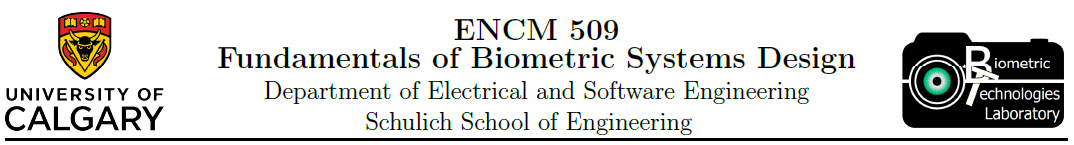

## Lab 3:

* Team member - Abid Al Labib 
    - UCID: 30070079
* Team member - Madhu Selvaraj
    - UCID: 30061979
    

## Introduction:
In this lab we take a look at Gaussian Mixture Model and how changing the number of training components can affect the results of a Gaussian Mixture model. We also applied knowledge learned from our lectures to find the FAR and FRR using hypothesis testing.

For this lab we used the signatures collected in lab 2.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [21]:
#loading the data
# data folder:
base_dir = './sig_vals/'

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir + 'g'
dir_impostor = base_dir + 'i'
dir_words = base_dir + 'w'
# amount of signatures to be loaded
total_signatures = 30
numForgedSigs = 30
# lists to store the loaded signatures
auth_lst = []
imp_lst = []
words_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_imp = pd.read_csv(dir_impostor + '%d.csv' % (i+1))
    csv_words = pd.read_csv(dir_words + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values) #ndarray
    imp_lst.append(csv_imp.values)
    words_lst.append(csv_words.values)

## Exercise 1

In [22]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = [20,25]

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = [20,60]

The number of signatures for training is the first 20 signatures from the genuine set is ,
and the number of Gaussian mixture components is 20
Average of authentic scores: -15.3490
Deviation of authentic scores: 0.3181
Average of forgery scores: -66.1922
Deviation of forgery scores: 76.8253


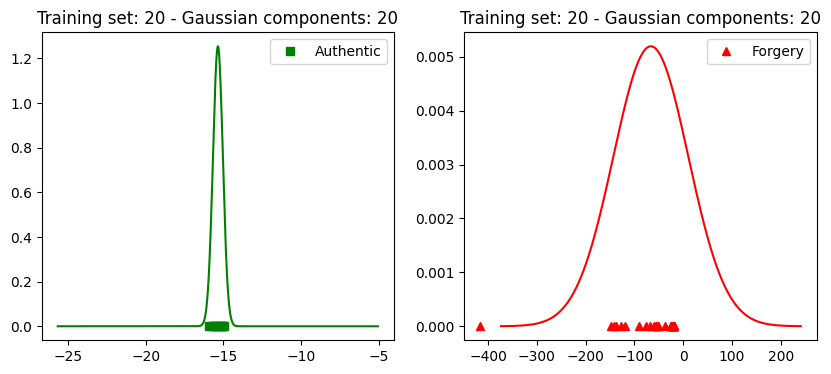

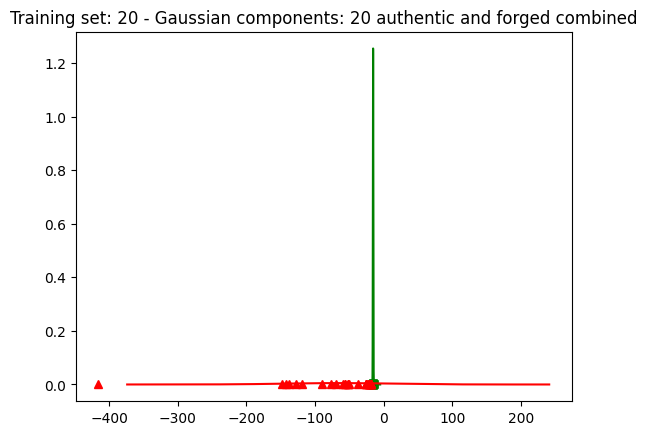

The number of signatures for training is the first 20 signatures from the genuine set is ,
and the number of Gaussian mixture components is 60
Average of authentic scores: -15.7060
Deviation of authentic scores: 0.9539
Average of forgery scores: -93.7512
Deviation of forgery scores: 134.0798


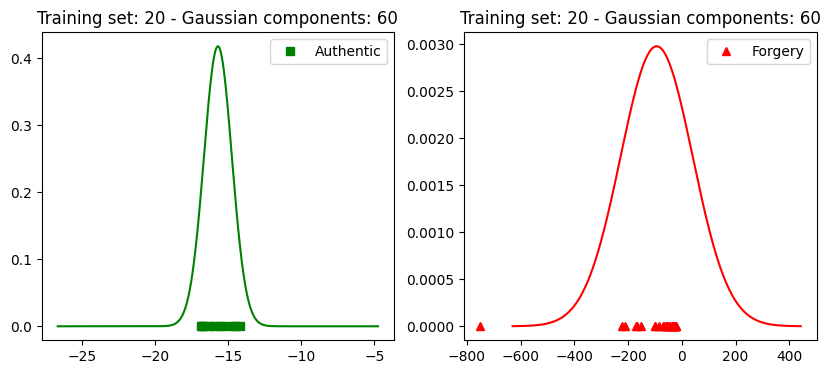

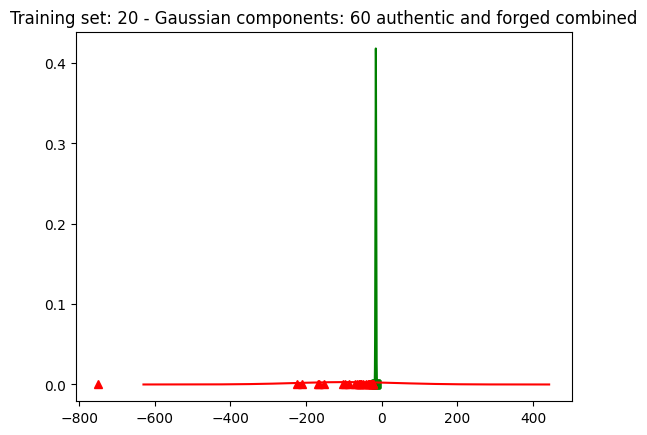

The number of signatures for training is the first 25 signatures from the genuine set is ,
and the number of Gaussian mixture components is 20
Average of authentic scores: -15.0087
Deviation of authentic scores: 0.4245
Average of forgery scores: -31.5759
Deviation of forgery scores: 21.5391


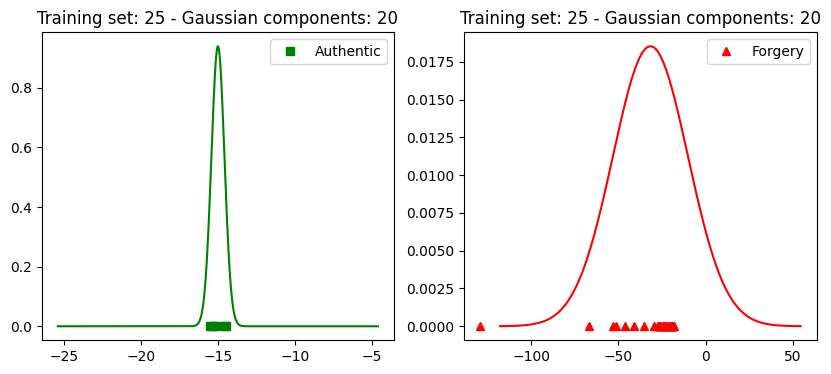

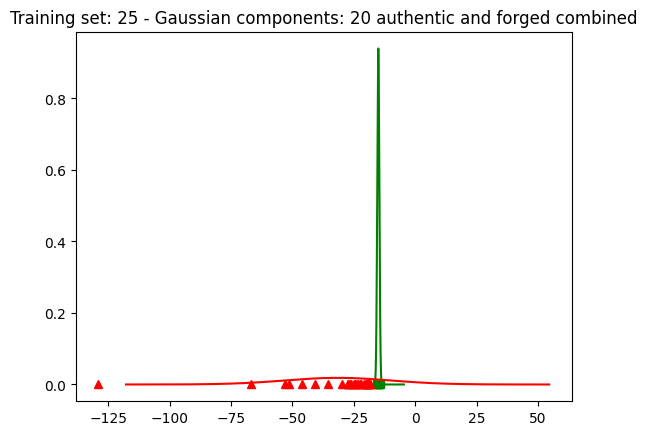

The number of signatures for training is the first 25 signatures from the genuine set is ,
and the number of Gaussian mixture components is 60
Average of authentic scores: -14.9860
Deviation of authentic scores: 0.7505
Average of forgery scores: -131.0439
Deviation of forgery scores: 192.8045


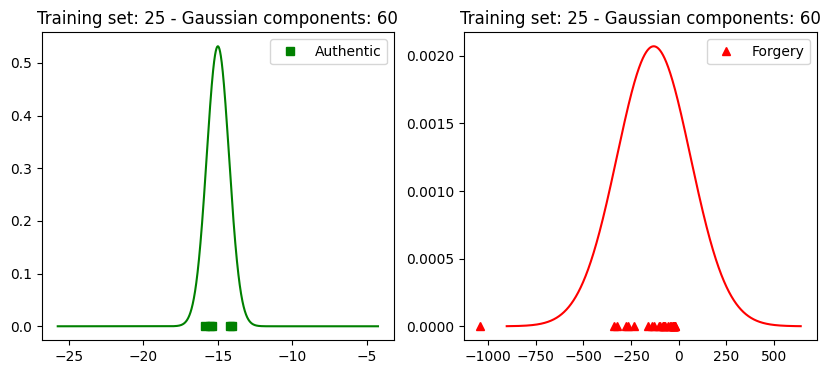

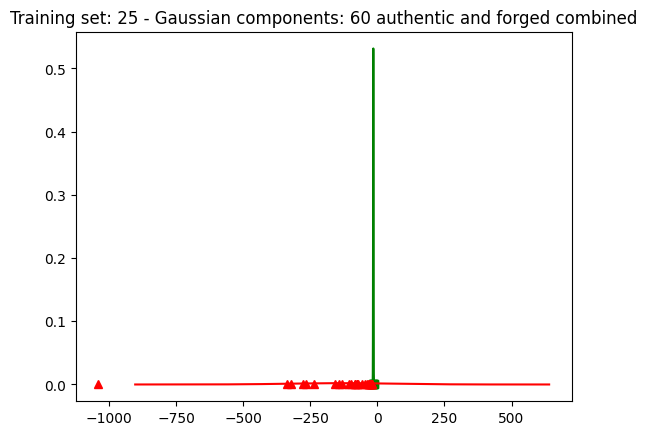

Mean of the 4 genuine scores -15.35080264126792
Std of the 4 genuine scores 0.7380515432136208
Mean of the 4 imposter (forgery) scores -80.64077781826225
Std of the 4 imposter (forgery) scores 129.27246647865132


In [23]:
gmmList = [] #store the models created
aScoresList = [] #store the genuine scores
fScoresList1 = [] #store the imposter scores from the first set (forgery)

for ntp in NUMTRAININGPATTERNS:
    for ngc in NUMGCOMPONENTS:
        print('The number of signatures for training is the first %d signatures from the genuine set is ,' % (ntp ))
        print('and the number of Gaussian mixture components is %d' % (ngc))
        
        train_set = np.reshape(auth_lst[0], (-1,4))
        for i in range(1,ntp):
            sample = np.reshape(auth_lst[i], (-1,4)) #getting the next sample from auth_list
            train_set = np.concatenate((train_set, sample), axis=0) #concatenating the samples
        
        gmm = GaussianMixture(n_components=ngc).fit(train_set)
        gmmList.append(gmm)

        # to store all the scores calculated
        aScores = [] 
        fScores = []

        # Testing the GaussianMixture model with remaining genuine signatures (10 in total)
        for i in range(ntp, total_signatures):
            sample =  np.reshape(auth_lst[i], (-1,4)) # taking from authentic/genuine samples

            score = gmm.score(sample) # compute the per-sample average log-likelihood of the given data
            aScores.append(score) # add the score calculated to the list aScores

        # Testing the GaussianMixture model with forged signatures (30 in total)
        for i in range(numForgedSigs):
            sample =  np.reshape(imp_lst[i], (-1,4)) # taking from the impostor samples

            score = gmm.score(sample)
            fScores.append(score)

        #calculating the mean and std
        # authentic set
        aMu = np.mean(aScores)
        aStd = np.std(aScores)
        aScoresList.append(aScores)

        # impostor set
        fMu = np.mean(fScores)
        fStd = np.std(fScores)
        fScoresList1.append(fScores)

        print('Average of authentic scores: %.4f' % (aMu))
        print('Deviation of authentic scores: %.4f' % (aStd))

        print('Average of forgery scores: %.4f' % (fMu))
        print('Deviation of forgery scores: %.4f' % (fStd))

        #PDF of the genuine and imposter samples
        plt.figure(figsize=(10,4))

        #Authentic set
        plt.subplot(1,2,1)
        x = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        aProb = norm.pdf(x, loc=aMu, scale=aStd)
        plt.plot(x, aProb, 'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.legend()
        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))

        # Forged (impostor) set
        plt.subplot(1,2,2)
        x = np.arange(fMu-4*fStd, fMu+4*fStd, 0.01)
        fProb = norm.pdf(x, loc=fMu, scale=fStd)
        plt.plot(x, fProb, 'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.legend()
        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))
        plt.show()

        #Combined authentic and imposter plot
        x_a = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        x_f = np.arange(fMu-4*fStd, fMu+4*fStd, 0.01)
        plt.plot(x_a,aProb,'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.plot(x_f,fProb,'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.title('Training set: {} - Gaussian components: {} authentic and forged combined'.format(ntp, ngc))
        plt.show()

aScoresFlat = [i for subScores in aScoresList for i in subScores]
fScoresList1Flat = [i for subScores in fScoresList1 for i in subScores]
print("Mean of the 4 genuine scores",np.mean(aScoresFlat))
print("Std of the 4 genuine scores",np.std(aScoresFlat))
print("Mean of the 4 imposter (forgery) scores",np.mean(fScoresList1Flat))
print("Std of the 4 imposter (forgery) scores",np.std(fScoresList1Flat))

For this exercise, we train 4 Gaussian Mixture models with training set size = 20, gaussian components = 20,  training set size = 20, gaussian components = 60, training set size = 25, gaussian components = 20, training set size = 25, gaussian components = 60. 

We classify the genuine and first imposter set (forged signatures) using the 4 models and display the mean and std of the genuine and imposter scores. The PDF of each classification is displayed, as well as the mean and std of the 4 genuine scores and 4 forgery scores at the end. 

From the results we can see that increasing the number of components while keep the training set size the same increases the deviation for both the genuine and forged signatures. While the keeping the number of gaussian components the same, increasing the training set size increases the mean of both the genuine and imposter scores. Furthermore, when we overlap the authentic and forged models, we can see that the distribution of the genuine scores has a large spike compared to the distribution of the forged signatures, this is due to the large difference in deviation.

## Exercise 2

The number of signatures for training is the first 20 signatures from the set,
and the number of Gaussian mixture components is 20
Average of authentic scores: -15.3490
Deviation of authentic scores: 0.3181
Average of second set of forgery scores: -36.2859
Deviation of second set of forgery scores: 30.2297


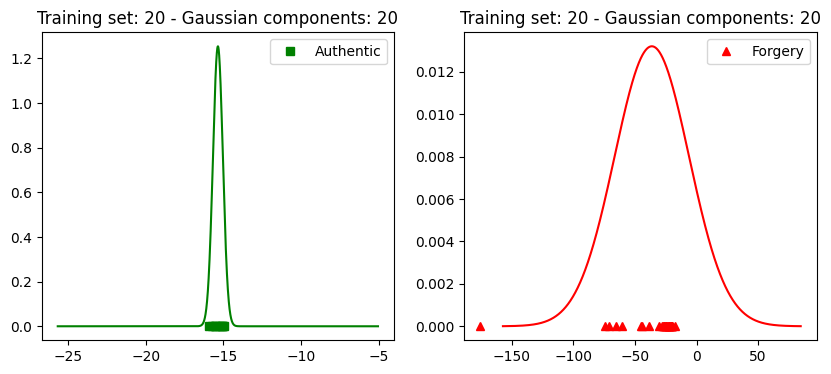

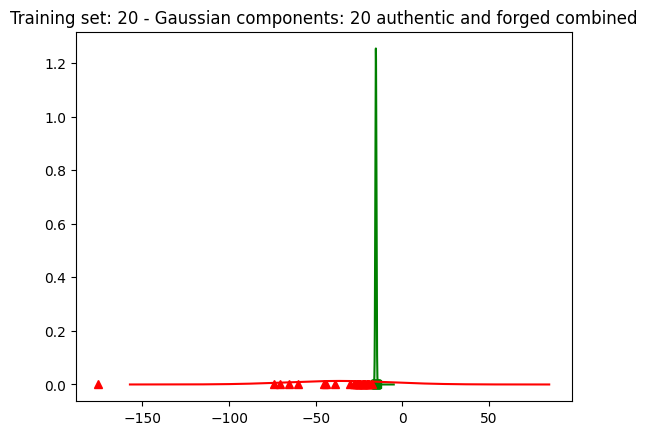

The number of signatures for training is the first 20 signatures from the set,
and the number of Gaussian mixture components is 60
Average of authentic scores: -15.7060
Deviation of authentic scores: 0.9539
Average of second set of forgery scores: -52.3846
Deviation of second set of forgery scores: 56.7658


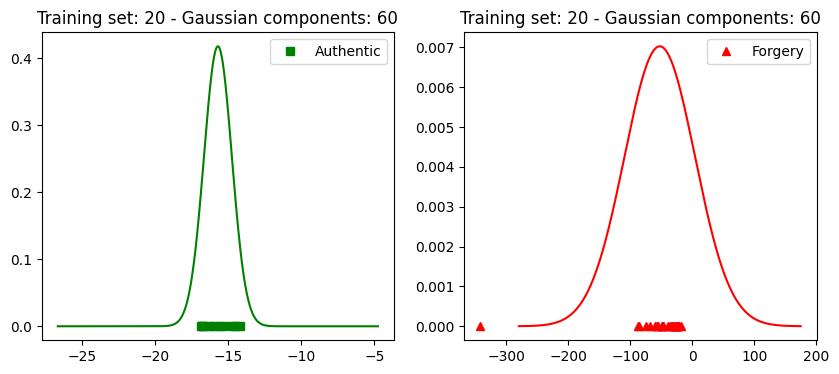

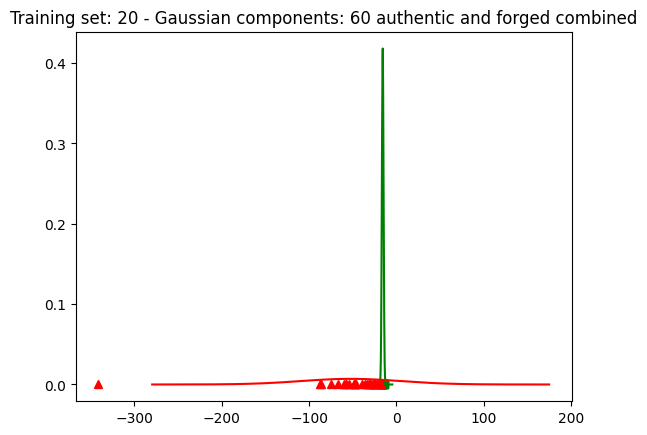

The number of signatures for training is the first 25 signatures from the set,
and the number of Gaussian mixture components is 20
Average of authentic scores: -15.0087
Deviation of authentic scores: 0.4245
Average of second set of forgery scores: -23.0474
Deviation of second set of forgery scores: 5.3361


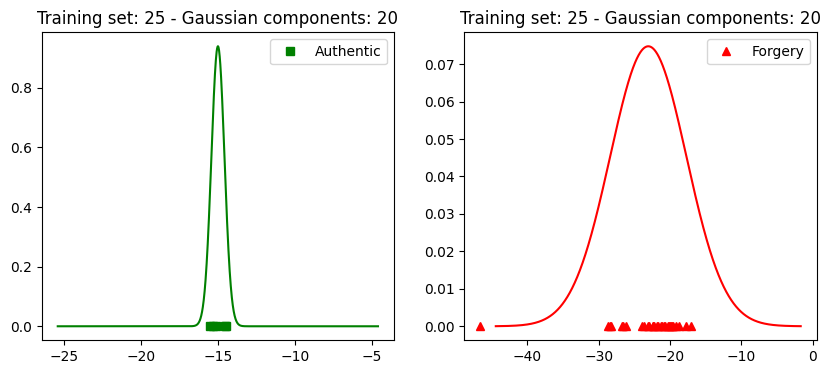

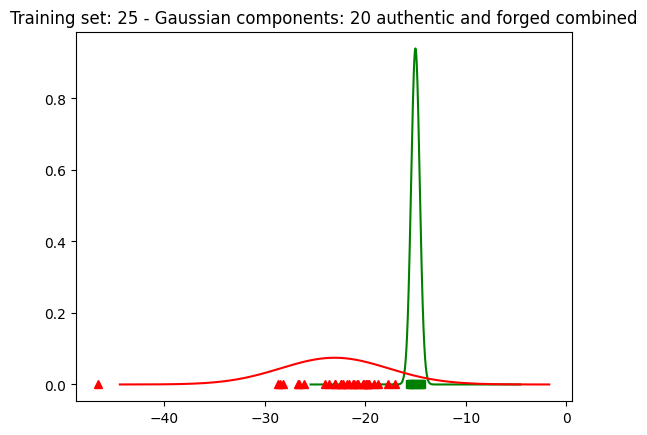

The number of signatures for training is the first 25 signatures from the set,
and the number of Gaussian mixture components is 60
Average of authentic scores: -14.9860
Deviation of authentic scores: 0.7505
Average of second set of forgery scores: -67.1094
Deviation of second set of forgery scores: 89.1597


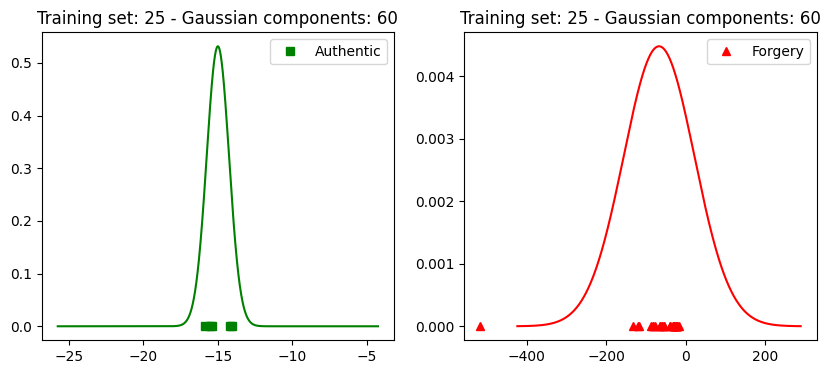

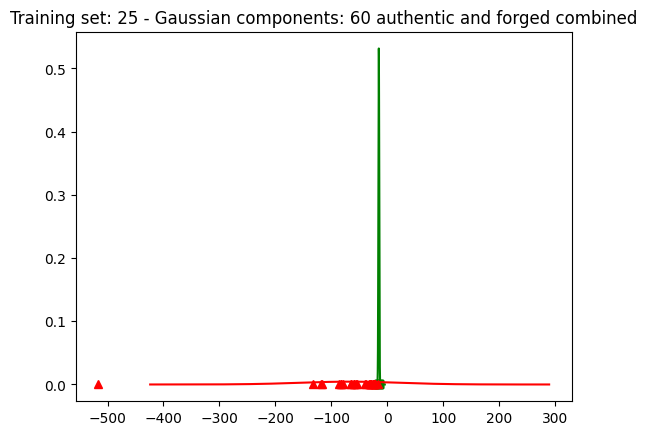

Mean of the 4 genuine scores -15.35080264126792
Std of the 4 genuine scores 0.7380515432136208
Mean of the 4 imposter (random words) scores -44.70680664263709
Std of the 4 imposter (random words) scores 57.47820808357608


In [24]:
j = 0 #to traverse the gmmList, use the same model as exercise 2 but just testing with a the second imposter set, that way genuine scores do not change
fScoresList2 = [] #store the imposter scores from the second set (random words)
for ntp in NUMTRAININGPATTERNS:
    for ngc in NUMGCOMPONENTS:
        print('The number of signatures for training is the first %d signatures from the set,' % (ntp ))
        print('and the number of Gaussian mixture components is %d' % (ngc))
        
        gmm = gmmList[j] #using the same models that were trained in ex 1

        # to store all the scores calculated for second imposter set
        fScores = []

        # Testing the GaussianMixture model with forged signatures (30 in total)
        for i in range(numForgedSigs):
            sample =  np.reshape(words_lst[i], (-1,4)) # taking from the impostor samples
            score = gmm.score(sample)
            fScores.append(score)

        #calculating the mean and std
        # authentic set
        aScores = aScoresList[j]
        aMu = np.mean(aScores) #same aScores as ex1
        aStd = np.std(aScores)

        # impostor set
        fMu = np.mean(fScores)
        fStd = np.std(fScores)
        fScoresList2.append(fScores)

        print('Average of authentic scores: %.4f' % (aMu))
        print('Deviation of authentic scores: %.4f' % (aStd))

        print('Average of second set of forgery scores: %.4f' % (fMu))
        print('Deviation of second set of forgery scores: %.4f' % (fStd))


        #PDF of the genuine and imposter samples

        x = np.arange(-60, 0, 0.01) # change this range for your set

        aProb = norm.pdf(x, loc=aMu, scale=aStd)
        fProb = norm.pdf(x, loc=fMu, scale=fStd)

        #PDF of the genuine and imposter samples
        plt.figure(figsize=(10,4))

        #Authentic set
        plt.subplot(1,2,1)
        x = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        aProb = norm.pdf(x, loc=aMu, scale=aStd)
        plt.plot(x, aProb, 'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.legend()
        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))

        # Forged (impostor) set
        plt.subplot(1,2,2)
        x = np.arange(fMu-4*fStd, fMu+4*fStd, 0.01)
        fProb = norm.pdf(x, loc=fMu, scale=fStd)
        plt.plot(x, fProb, 'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.legend()
        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))
        plt.show()

        #Combined authentic and imposter plot
        x_a = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        x_f = np.arange(fMu-4*fStd, fMu+4*fStd, 0.01)
        plt.plot(x_a,aProb,'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.plot(x_f,fProb,'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.title('Training set: {} - Gaussian components: {} authentic and forged combined'.format(ntp, ngc))
        plt.show()

        j = j+1

aScoresFlat = [i for subScores in aScoresList for i in subScores]
fScoresList2Flat = [i for subScores in fScoresList2 for i in subScores]
print("Mean of the 4 genuine scores",np.mean(aScoresFlat))
print("Std of the 4 genuine scores",np.std(aScoresFlat))
print("Mean of the 4 imposter (random words) scores",np.mean(fScoresList2Flat))
print("Std of the 4 imposter (random words) scores",np.std(fScoresList2Flat))


For this exercise we classify the genuine and second imposter set (random words) using the same 4 Gaussian Mixture models with varying parameters from Ex 1. The PDF of each classification is displayed, as well as the mean and std of the 4 genuine scores and 4 imposter (random words) scores at the end. 

Very similar to exercise 1 we can see that increasing the number of components increases the deviation in the models for both the authentic and second set of forged signature dataset. Furthermore when overlapping the authentic and second set of forged distribution scores, we can see that the distribution of authentic signature scores has a large spike compared to the distribution of forged signature scores, this is due to the large difference in deviation.

## Exercise 3

For this exercise, we first use the mean and std of one pair of the evaluated models (training set = 20, gaussian components = 20). We then estimate the confidence interval for the population mean with a significance level of 0.05 and form our null hypothesis. We calculate FRR and FAR for the population, and then FRR for the sample. We then expand the critical region by changing the critical values. Finally, we recompute the confidence interval and calculate the new FRR and FAR.



In [130]:
from math import sqrt

gMean = round(np.mean(aScoresList[0]),2)
gStd = round(np.std(aScoresList[0]),2)

print("Using scores from the Gaussian Mixture model with a training size of 20 and number of gaussian components as 20")
print("Mean of the genuine scores: ",gMean)
print("Std of the genuine scores: ",gStd)


print("\n\nConfidence interval for alpha = 0.05")
left = round(gMean-1.96*(gStd/sqrt(10)),2) #critical values
right = round(gMean+1.96*(gStd/sqrt(10)),2)
print(left,"< \u03BC <",right)
hyp = (left+right )/2 #null hyp
print("Null hypothesis: \u03BC =",round(hyp,2))
print("FRR = P(Type 1 Error) = \u03B1 = ",0.05)

#calculating FAR
altHyp =  round(hyp-0.16,2)
print("\nFAR = P(Type 2 Error) = \u03B2 = P(",left,"< \u03BC <",right,"when \u03BC = ",altHyp,")")
z1 = round((left-altHyp)/(gStd/(sqrt(10))),2)
z2 = round((right-altHyp)/(gStd/(sqrt(10))),2)
print("FAR = \u03B2 = P(",z1,"< \u03BC <",z2,")")
print("FAR = 0.99981-0.34458 = ",round(0.99981-0.34458,2))

print("\n\nFRR for the sample")
fr = sum(1 for i in aScoresList[0] if i> -15.15 or i< -15.55) #count number of genuine scores that are outside of the critical region
fr_l = [l for l in aScoresList[0] if l> -15.15 or l< -15.55]

print("Number of False Rejections (scores outside of confidence interval) =",fr)
print(fr_l)
print("FRR = FR/(FR+TA) = ", fr, "/10 = ",fr/10)

print("\nChanging the critical values")
nLeft = -15.57
nRight = -15.09
print(nLeft,"< \u03BC <",nRight)

new_z1 = round((nLeft-hyp)/(gStd/(sqrt(10))),2)
new_z2 = round((nRight-hyp)/(gStd/(sqrt(10))),2)
print("FRR = P(z<",new_z1,") + P(z>",new_z2,")")
print("FRR = 0.01500-(1-0.99492) = ",round(0.01500-(1-0.99492),2))

nAltHyp = round(0.07+(nLeft+nRight )/2,2)
print("\nFAR = P(Type 2 Error) = \u03B2 = P(",nLeft,"< \u03BC <",nRight,"when \u03BC = ",nAltHyp,")")
far_z1 = round((nLeft-nAltHyp)/(gStd/(sqrt(10))),2)
far_z2 = round((nRight-nAltHyp)/(gStd/(sqrt(10))),2)
print("FAR = \u03B2 = P(",far_z1,"< \u03BC <",far_z2,")")
print("FAR = 0.95352-0.00111 = ",round(0.95352-0.00111,2))

Using scores from the Gaussian Mixture model with a training size of 20 and number of gaussian components as 20
Mean of the genuine scores:  -15.35
Std of the genuine scores:  0.32


Confidence interval for alpha = 0.05
-15.55 < μ < -15.15
Null hypothesis: μ = -15.35
FRR = P(Type 1 Error) = α =  0.05

FAR = P(Type 2 Error) = β = P( -15.55 < μ < -15.15 when μ =  -15.51 )
FAR = β = P( -0.4 < μ < 3.56 )
FAR = 0.99981-0.34458 =  0.66


FRR for the sample
Number of False Rejections (scores outside of confidence interval) = 6
[-15.081192265112719, -15.087035133732389, -14.939789961170382, -15.018832133340203, -15.720633296488229, -15.94445843424698]
FRR = FR/(FR+TA) =  6 /10 =  0.6

Changing the critical values
-15.57 < μ < -15.09
FRR = P(z< -2.17 ) + P(z> 2.57 )
FRR = 0.01500-(1-0.99492) =  0.01

FAR = P(Type 2 Error) = β = P( -15.57 < μ < -15.09 when μ =  -15.26 )
FAR = β = P( -3.06 < μ < 1.68 )
FAR = 0.95352-0.00111 =  0.95


![Ex 3 Work](ex3.jpg)